In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [4]:
train = pd.read_csv("../input/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass    ...         Fare        Cabin  Embarked
0              1         0       3    ...       7.2500          NaN         S
1              2         1       1    ...      71.2833          C85         C
2              3         1       3    ...       7.9250          NaN         S
3              4         1       1    ...      53.1000         C123         S
4              5         0       3    ...       8.0500          NaN         S
5              6         0       3    ...       8.4583          NaN         Q
6              7         0       1    ...      51.8625          E46         S
7              8         0       3    ...      21.0750          NaN         S
8              9         1       3    ...      11.1333          NaN         S
9             10         1       2    ...      30.0708          NaN         C
10            11         1       3    ...      16.7000           G6         S
11            12         1    

In [7]:
test=pd.read_csv("../input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.shape

(418, 11)

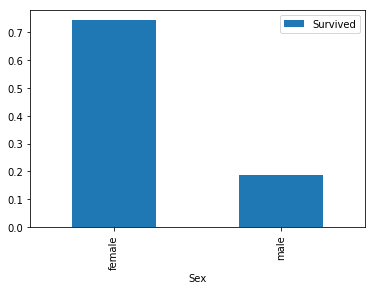

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

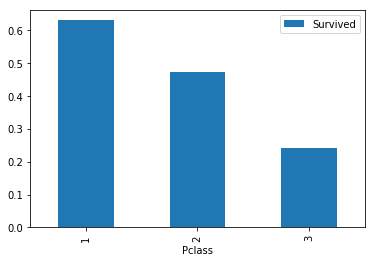

In [11]:
pclass_pivot = train.pivot_table(index="Pclass",values='Survived')
pclass_pivot.plot.bar()
plt.show()

In [13]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

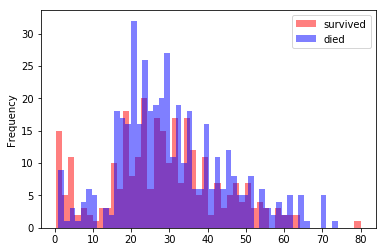

In [15]:
survived = train[train["Survived"]==1]
died = train[train["Survived"]==0]
survived["Age"].plot.hist(alpha=0.5,color = 'red',bins =50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins =50)
plt.legend(['survived','died'])
plt.show()

In [16]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_cat"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

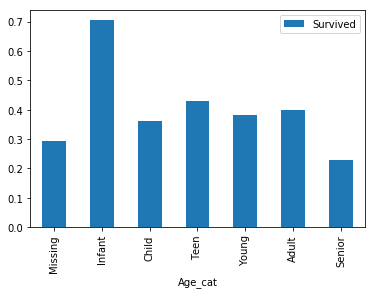

In [18]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teen","Young","Adult","Senior"]

train=process_age(train,cut_points,label_names)
test =process_age(test,cut_points,label_names)

pivot = train.pivot_table(index = "Age_cat",values ="Survived")
pivot.plot.bar()
plt.show()

In [19]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
def create_dummy(df,column_name):
    dummy = pd.get_dummies(df[column_name],prefix = column_name)
    df = pd.concat([df,dummy],axis =1)
    return df


In [25]:
for col in ["Pclass","Sex","Age_cat"]:
    train = create_dummy(train,col)
    test = create_dummy(test,col)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_cat_Missing,Age_cat_Infant,Age_cat_Child,Age_cat_Teen,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,0,0,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,1,0,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,0,0,1,0,1,0,0,0,0,1,0,0


In [27]:
from sklearn.linear_model import LogisticRegression
columns = ['Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Age_cat_Missing','Age_cat_Infant','Age_cat_Child','Age_cat_Teen','Age_cat_Young','Age_cat_Adult','Age_cat_Senior']
lr = LogisticRegression()
lr.fit(train[columns],train["Survived"])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
hold =test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train[columns],train["Survived"],test_size=0.20,random_state =0)
pred = lr.fit(X_train,Y_train).predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred))

0.8100558659217877


In [36]:
holdout_pred = lr.predict(hold[columns])

In [37]:
holdout_id = hold["PassengerId"]
sub_df = {"PassengerId":holdout_id,"Survived":holdout_pred}
submission = pd.DataFrame(sub_df)

In [ ]:
submission.to_csv("submission_csv",index=False)